In [23]:
## IMPORTING NECESSARY LIBRARIES
from google.colab import files
import zipfile
import os
import io
from io import BytesIO
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.applications import ResNet50, InceptionV3
from keras.optimizers import Adamax

In [24]:
## UPLOADING THE FLOWER ZIP FILE
uploaded = files.upload()

Saving LUNG_COLON.zip to LUNG_COLON (1).zip


In [26]:
## EXTRACTING THE CONTENTS FROM THE FLOWER ZIP FILE
data= zipfile.ZipFile(io.BytesIO(uploaded['LUNG_COLON (1).zip']))
data.extractall()
data.printdir()
data.close()

File Name                                             Modified             Size
LUNG_COLON/                                    2024-11-04 20:52:54            0
LUNG_COLON/test_dir/                           2024-11-04 20:51:48            0
LUNG_COLON/test_dir/test_colon_aca/            2024-11-04 20:49:04            0
LUNG_COLON/test_dir/test_colon_aca/colonca1797.jpeg 2024-11-04 20:49:04        89699
LUNG_COLON/test_dir/test_colon_aca/colonca1798.jpeg 2024-11-04 20:49:04       114447
LUNG_COLON/test_dir/test_colon_aca/colonca1799.jpeg 2024-11-04 20:49:04       100746
LUNG_COLON/test_dir/test_colon_aca/colonca1800.jpeg 2024-11-04 20:49:04        91639
LUNG_COLON/test_dir/test_colon_aca/colonca1801.jpeg 2024-11-04 20:49:04        82433
LUNG_COLON/test_dir/test_colon_aca/colonca1802.jpeg 2024-11-04 20:49:04        96920
LUNG_COLON/test_dir/test_colon_aca/colonca1803.jpeg 2024-11-04 20:49:04       106196
LUNG_COLON/test_dir/test_colon_aca/colonca1804.jpeg 2024-11-04 20:49:04        76171


In [27]:
## PATH CREATION
base_dir = 'LUNG_COLON'

train_dir = os.path.join(base_dir, 'train_dir')
test_dir = os.path.join(base_dir, 'test_dir')

train_lung_aca_dir = os.path.join(train_dir, 'train_lung_aca')
train_lung_no_dir = os.path.join(train_dir, 'train_lung_no')
train_lung_sc_dir = os.path.join(train_dir, 'train_lung_sc')
train_colon_aca_dir = os.path.join(train_dir, 'train_colon_aca')
train_colon_no_dir = os.path.join(train_dir, 'train_colon_no')

test_lung_aca_dir = os.path.join(test_dir, 'test_lung_aca')
test_lung_no_dir = os.path.join(test_dir, 'test_lung_no')
test_lung_sc_dir = os.path.join(test_dir, 'test_lung_sc')
test_colon_aca_dir = os.path.join(test_dir, 'test_colon_aca')
test_colon_no_dir = os.path.join(test_dir, 'test_colon_no')

tr_lung_aca_fnames = os.listdir(train_lung_aca_dir)
tr_lung_no_fnames = os.listdir(train_lung_no_dir)
tr_lung_sc_fnames = os.listdir(train_lung_sc_dir)
tr_colon_aca_fnames = os.listdir(train_colon_aca_dir)
tr_colon_no_fnames = os.listdir(train_colon_no_dir)

print(tr_lung_aca_fnames)
print(tr_lung_no_fnames)
print(tr_lung_sc_fnames)
print(tr_colon_aca_fnames)
print(tr_colon_no_fnames)



['lungaca3.jpeg', 'lungaca2.jpeg', 'lungaca9.jpeg', 'lungaca8.jpeg', 'lungaca10.jpeg', 'lungaca4.jpeg', 'lungaca6.jpeg', 'lungaca1.jpeg', 'lungaca7.jpeg', 'lungaca5.jpeg']
['lungn10.jpeg', 'lungn5.jpeg', 'lungn3.jpeg', 'lungn9.jpeg', 'lungn1.jpeg', 'lungn7.jpeg', 'lungn8.jpeg', 'lungn6.jpeg', 'lungn2.jpeg', 'lungn4.jpeg']
['lungscc7.jpeg', 'lungscc9.jpeg', 'lungscc1.jpeg', 'lungscc5.jpeg', 'lungscc6.jpeg', 'lungscc8.jpeg', 'lungscc2.jpeg', 'lungscc10.jpeg', 'lungscc3.jpeg', 'lungscc4.jpeg']
['colonca5.jpeg', 'colonca9.jpeg', 'colonca7.jpeg', 'colonca8.jpeg', 'colonca4.jpeg', 'colonca10.jpeg', 'colonca1.jpeg', 'colonca3.jpeg', 'colonca6.jpeg', 'colonca2.jpeg']
['colonn10.jpeg', 'colonn8.jpeg', 'colonn7.jpeg', 'colonn1.jpeg', 'colonn5.jpeg', 'colonn9.jpeg', 'colonn6.jpeg', 'colonn2.jpeg', 'colonn4.jpeg', 'colonn3.jpeg']


In [28]:
tst_lung_aca_fnames = os.listdir(test_lung_aca_dir)
tst_lung_no_fnames = os.listdir(test_lung_no_dir)
tst_lung_sc_fnames = os.listdir(test_lung_sc_dir)
tst_colon_aca_fnames = os.listdir(test_colon_aca_dir)
tst_colon_no_fnames = os.listdir(test_colon_no_dir)

print(tst_lung_aca_fnames)
print(tst_lung_no_fnames)
print(tst_lung_sc_fnames)
print(tst_colon_aca_fnames)
print(tst_colon_no_fnames)

['lungaca1715.jpeg', 'lungaca1708.jpeg', 'lungaca1710.jpeg', 'lungaca1711.jpeg', 'lungaca1714.jpeg', 'lungaca1713.jpeg', 'lungaca1712.jpeg', 'lungaca1709.jpeg']
['lungn1278.jpeg', 'lungn1276.jpeg', 'lungn1282.jpeg', 'lungn1281.jpeg', 'lungn1280.jpeg', 'lungn1277.jpeg', 'lungn1279.jpeg']
['lungscc2279.jpeg', 'lungscc2286.jpeg', 'lungscc2282.jpeg', 'lungscc2285.jpeg', 'lungscc2280.jpeg', 'lungscc2284.jpeg', 'lungscc2281.jpeg', 'lungscc2283.jpeg']
['colonca1804.jpeg', 'colonca1797.jpeg', 'colonca1800.jpeg', 'colonca1801.jpeg', 'colonca1802.jpeg', 'colonca1803.jpeg', 'colonca1798.jpeg', 'colonca1799.jpeg', 'colonca1805.jpeg']
['colonn1214.jpeg', 'colonn1216.jpeg', 'colonn1221.jpeg', 'colonn1218.jpeg', 'colonn1220.jpeg', 'colonn1215.jpeg', 'colonn1219.jpeg', 'colonn1217.jpeg']


In [29]:
## PRINTING THE NUMBER OF TRAINING IMAGES FOR EACH OF THE 5 CLASSES OF THE LUNG_COLON_CANCER DATASET
print("Number of LUNG_ACA Files are", len(tr_lung_aca_fnames))
print("Number of LUNG_NO Files are", len(tr_lung_no_fnames))
print("Number of LUNG_SC Files are", len(tr_lung_sc_fnames))
print("Number of COLON_ACA Files are", len(tr_colon_aca_fnames))
print("Number of COLON_NO Files are", len(tr_colon_no_fnames))


Number of LUNG_ACA Files are 10
Number of LUNG_NO Files are 10
Number of LUNG_SC Files are 10
Number of COLON_ACA Files are 10
Number of COLON_NO Files are 10


In [30]:
## PRINTING THE NUMBER OF TEST IMAGES FOR EACH OF THE 5 CLASSES OF THE LUNG_COLON_CANCER DATASET
print("Number of LUNG_ACA Files are", len(tst_lung_aca_fnames))
print("Number of LUNG_NO Files are", len(tst_lung_no_fnames))
print("Number of LUNG_SC Files are", len(tst_lung_sc_fnames))
print("Number of COLON_ACA Files are", len(tst_colon_aca_fnames))
print("Number of COLON_NO Files are", len(tst_colon_no_fnames))



Number of LUNG_ACA Files are 8
Number of LUNG_NO Files are 7
Number of LUNG_SC Files are 8
Number of COLON_ACA Files are 9
Number of COLON_NO Files are 8


In [31]:
## DATA AUGMENTATION FOR THE TRAINING DATASET
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [32]:
## RESCALING THE TEST DATA

test_datagen = ImageDataGenerator(rescale=1/255)


In [33]:
## GENERATING TRAIN AND TEST IMAGES
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(258, 258),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(258, 258),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 50 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [34]:
## SEPARATING THE TRAINING DATA INTO X AND y

X, y = next(train_data)

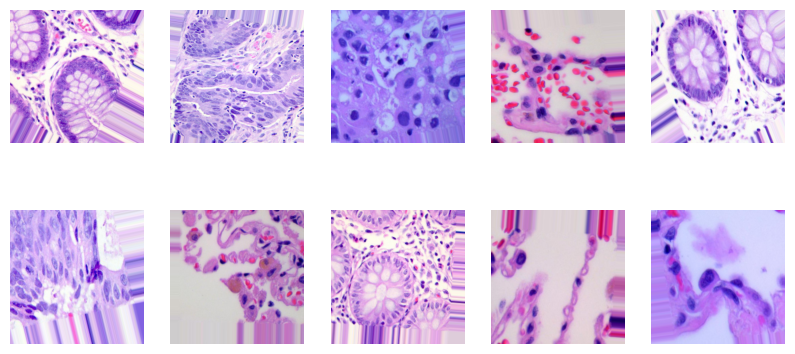

In [35]:
## DEFINING THE CLASSES OR LABELS FOR EACH OF THE 5 CLASSES OF LUNG_COLON CANCER DATASET
class_names = ['0', '1', '2','3', '4', '5']

## VISUALIZING THE FIRST 10 IMAGES
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X[i])
    plt.axis('off')


In [36]:
## MODEL BUILDING USING RESNET50 FROM THE KEARS APPLICATIONS
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(258, 258, 3))



In [37]:
## ARCHITECTURE OF THE NETWORK
model = Sequential([base_model, GlobalAveragePooling2D(), Dense(5, activation='softmax')])


In [38]:
## FREEZING THE BASE MODEL LAYERS
base_model.trainable = False


In [39]:
## MODEL COMPILATION
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
## MODEL TRAINING
history = model.fit(train_data, validation_data=test_data, epochs=15)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.8175 - loss: 0.8129 - val_accuracy: 0.6250 - val_loss: 0.9266
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 10s/step - accuracy: 0.8378 - loss: 0.7721 - val_accuracy: 0.6500 - val_loss: 0.9017
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.9021 - loss: 0.6933 - val_accuracy: 0.6750 - val_loss: 0.8838
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 14s/step - accuracy: 0.8481 - loss: 0.7161 - val_accuracy: 0.6750 - val_loss: 0.8701
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.8650 - loss: 0.7074 - val_accuracy: 0.6750 - val_loss: 0.8538
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.8546 - loss: 0.7133 - val_accuracy: 0.6750 - val_loss: 0.8360
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 11s/step - accuracy: 0.8830 - loss: 0.6966 - val_accuracy: 0.6750 - val_loss: 0.8174
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.8546 - loss: 0.6150 - val_accuracy: 0.7000 - val_loss: 0.7965
Epoch

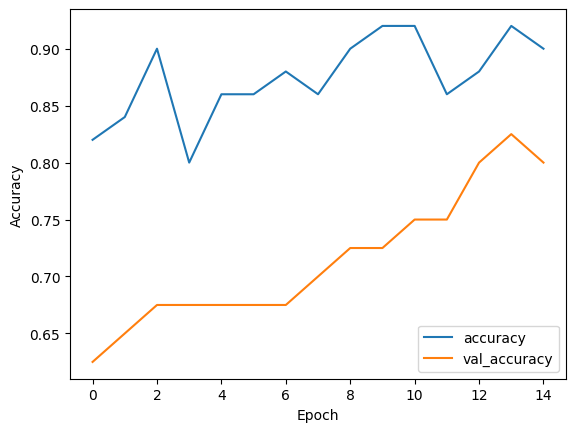

In [42]:
## VISUALIZING THE TRAINING RESULT HISTORY
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [43]:
## MODEL EVALUATION
loss, test_accuracy = model.evaluate(test_data)
print(test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8250 - loss: 0.6715
0.800000011920929
